## **Unveiling the Android App Market**

#### **Analyzing Google Play Store Data**

DESCRIPTION: Clean, categorize, and visualize Google Play Store data to understand app market dynamics.
Gain in-depth insights into the Android app market by leveraging data analytics, visualization,
and enhanced interpretation skills.
It is Project 4 Proposal Level-2 from Oaisis infobyte

Dataset link: https://www.kaggle.com/datasets/utshabkumarghosh/android-app-market-on-google-play

date: 13 sept 2024

--------------------------------- **PROJECT** ----------------------------------------------

Project Tasks¶

    Google Play Store apps and reviews
    Data cleaning
    Correcting data types
    Exploring app categories
    Distribution of app ratings
    Size and price of an app
    Relation between app category and app price
    Popularity of paid apps vs free apps
    Sentiment analysis of user reviews

In [1]:
#load necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#to keep everything in one plane
%matplotlib inline 

In [2]:
# warnings module in Python provides a way to control how warnings handled within a Python script
import warnings

In [3]:
warnings.filterwarnings('ignore')#ignore the warnings

loading the data into a dataframe

In [4]:
data=pd.read_csv('apps_data.csv') 

### DATA INSPECTION 

In [5]:
#displays top 5 row values
data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#displays last 5 row values
data.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9658,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
#for finding out the shape of the data. it is a attribute not a method
data.shape

(9659, 14)

In [8]:
#printing the no. of rows and columns
print("Number of Rows are",data.shape[0])
print("Number of Columns are",data.shape[1])

Number of Rows are 9659
Number of Columns are 14


In [9]:
#Information About Our Dataset Like
#the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [10]:
#to know the total no. of columns
data.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [11]:
#to Get Overall Statistics About The Dataset
data.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


<Axes: >

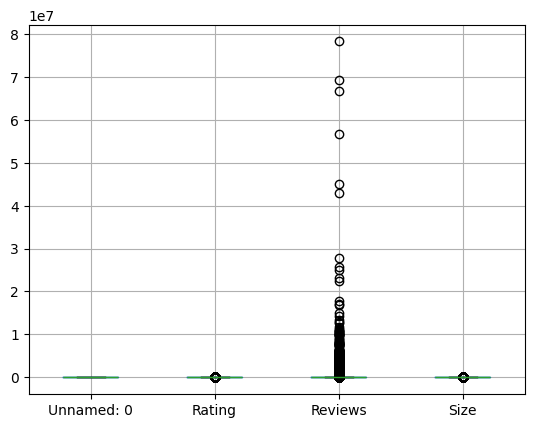

In [12]:
data.boxplot()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Reviews'}>,
        <Axes: title={'center': 'Size'}>]], dtype=object)

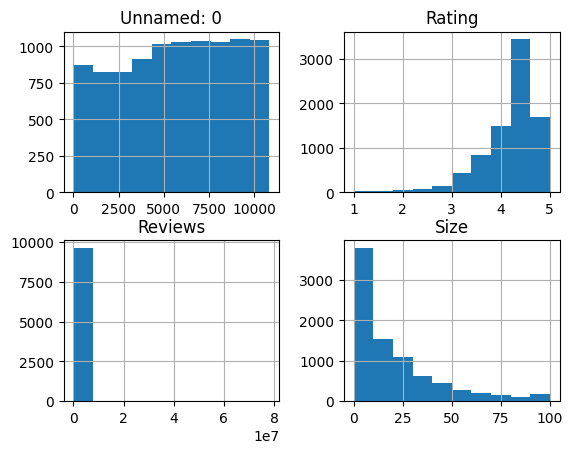

In [13]:
data.hist()

In [14]:
#finding out the null values
data.isnull()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9655,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9656,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9657,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [15]:
#find out the count of null values
data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

As we can see rating and reviews has 1463 and 1227 null values also Android ver has 2 null values

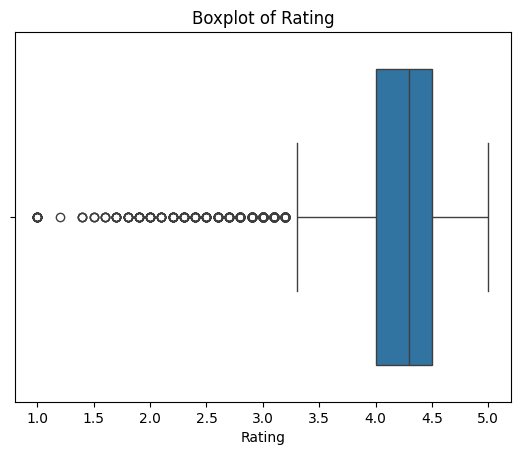

In [16]:
sns.boxplot(x=data['Rating'])
plt.title('Boxplot of Rating')
plt.show()

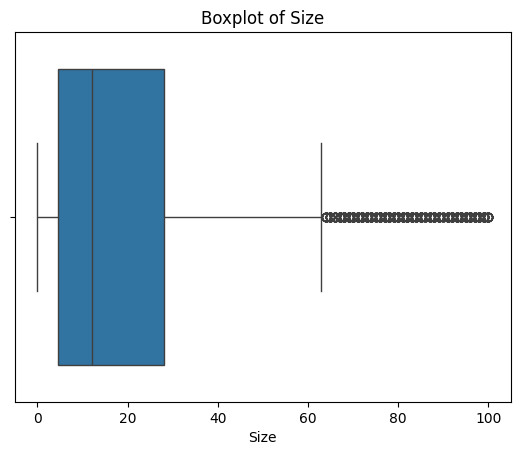

In [17]:
sns.boxplot(x=data['Size'])
plt.title('Boxplot of Size')
plt.show()

In [18]:
data[data.Size > 60]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
169,169,English Persian Dictionary,BOOKS_AND_REFERENCE,4.5,26875,73.0,"500,000+",Free,0,Everyone,Books & Reference,"August 1, 2018",6.0.8,4.0.3 and up
343,379,My Vodacom SA,COMMUNICATION,3.7,25021,61.0,"5,000,000+",Free,0,Everyone,Communication,"June 26, 2018",9.9.0,4.3 and up
344,380,Microsoft Edge,COMMUNICATION,4.3,27187,66.0,"5,000,000+",Free,0,Everyone,Communication,"July 28, 2018",42.0.0.2059,4.4 and up
478,569,"SweetRing - Meet, Match, Date",DATING,4.0,51698,63.0,"1,000,000+",Free,0,Mature 17+,Dating,"July 26, 2018",3.0.0,4.0.3 and up
499,600,"iPair-Meet, Chat, Dating",DATING,4.5,182986,77.0,"5,000,000+",Free,0,Mature 17+,Dating,"August 2, 2018",5.0.8,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601,10783,Modern Counter Terror Attack – Shooting Game,GAME,4.2,340,72.0,"50,000+",Free,0,Mature 17+,Action,"October 27, 2017",1,4.1 and up
9602,10784,Big Hunter,GAME,4.3,245455,84.0,"10,000,000+",Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up
9611,10793,Sid Story,GAME,4.4,28510,78.0,"500,000+",Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
9621,10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81.0,"1,000,000+",Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up


In [19]:
#fill the null values with appropiate value using aggregate function such as mean median or mode.
#Define a function impute median
def impute_median(series):
    return series.fillna(series .median())

In [20]:
data.Rating = data['Rating'].transform(impute_median)
data.Size = data['Size'].transform(impute_median)

In [21]:
#mode of categorial values
print(data['Current Ver'].mode())
print(data['Android Ver'].mode())

0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [22]:
#fill the missing categorial values with modes
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]),inplace=True)
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]),inplace=True)

In [23]:
#count the number of null values in each column
data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [24]:
data.head(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [25]:
# convert price, review and rating into Numerical vaules
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [26]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [27]:
data.head(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [28]:
data.describe()

,Unnamed: 0,Rating,Reviews,Size,Installs,Price
count,9659.000000,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,5666.172896,4.192442,2.165926e+05,19.328854,7.777507e+06,1.099299
std,3102.362863,0.496397,1.831320e+06,20.584647,5.375828e+07,16.852152
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,5814.000000,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,8327.500000,4.500000,2.940100e+04,25.000000,1.000000e+06,0.000000
max,10840.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


### DATA VISUALIZATION

In [29]:
#Data VISUALIZATION 
grp = data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.354687
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154921
DATING                 4.041520
EDUCATION              4.363866
ENTERTAINMENT          4.135294
EVENTS                 4.395313
FAMILY                 4.194378
FINANCE                4.138551
FOOD_AND_DRINK         4.192857
GAME                   4.249948
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.174324
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.202025
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.166548
PRODUCTIVITY           4.206150
SHOPPING               4.237624
SOCIAL                 4.255230
SPORTS                 4.232923
TOOLS                  4.073881
TRAVEL_AND_LOCAL       4.103196

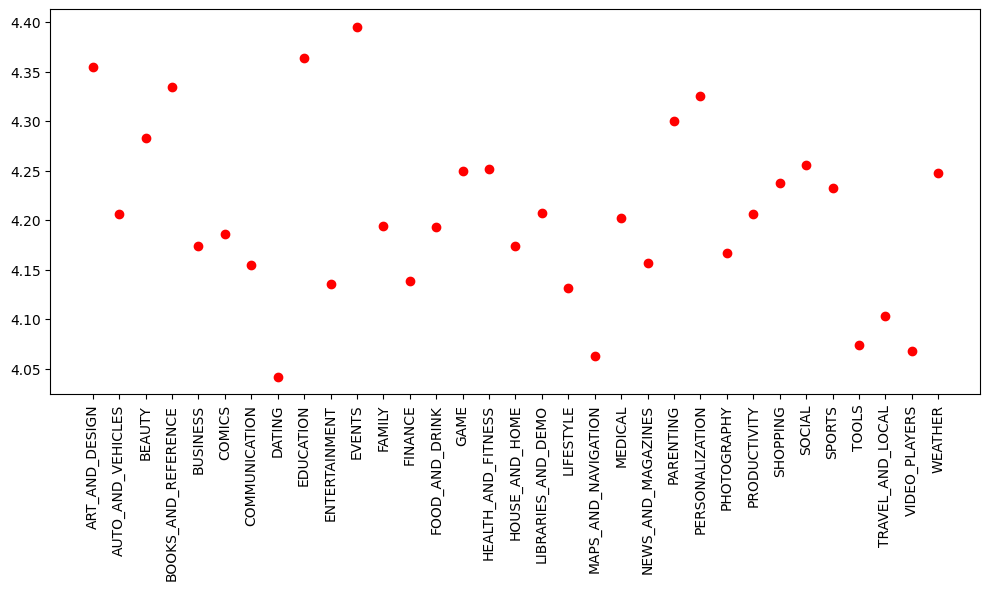

In [30]:
plt.figure(figsize=(12,5))
plt.plot(x, 'ro')#red
plt.xticks(rotation=90)#to change the rotation of the texts
plt.show()

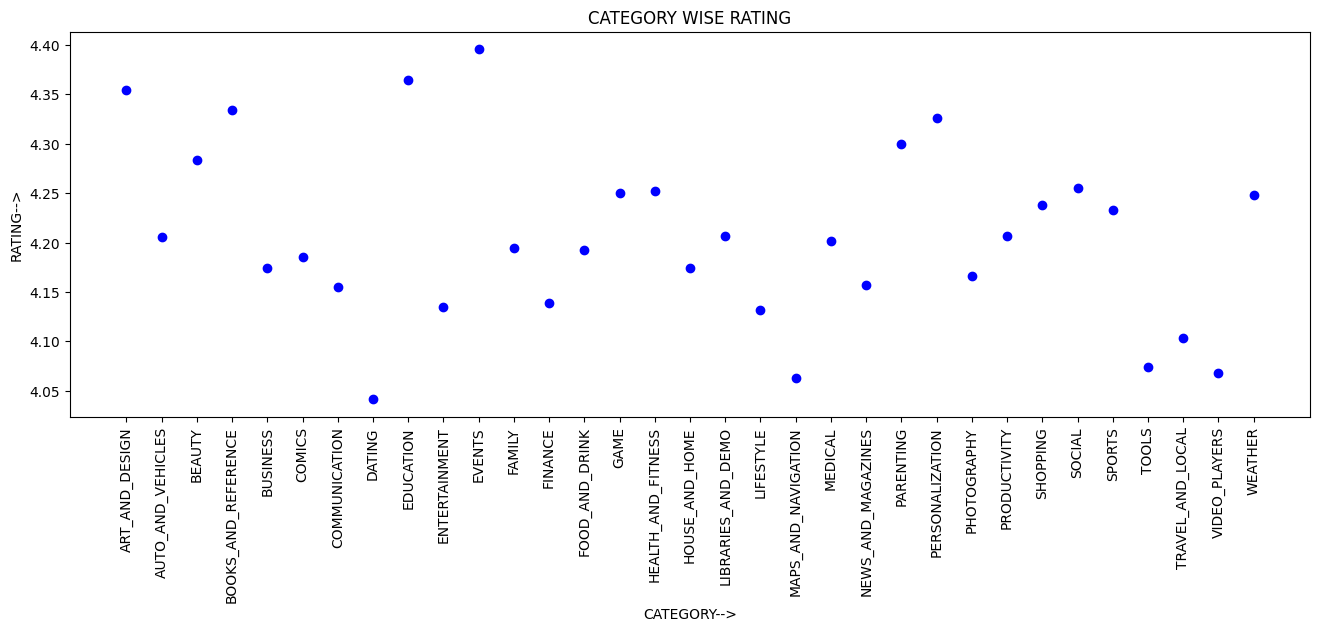

In [31]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='b')
plt.xticks(rotation=90)
plt.title('CATEGORY WISE RATING')
plt.xlabel('CATEGORY-->')
plt.ylabel('RATING-->')
plt.show()

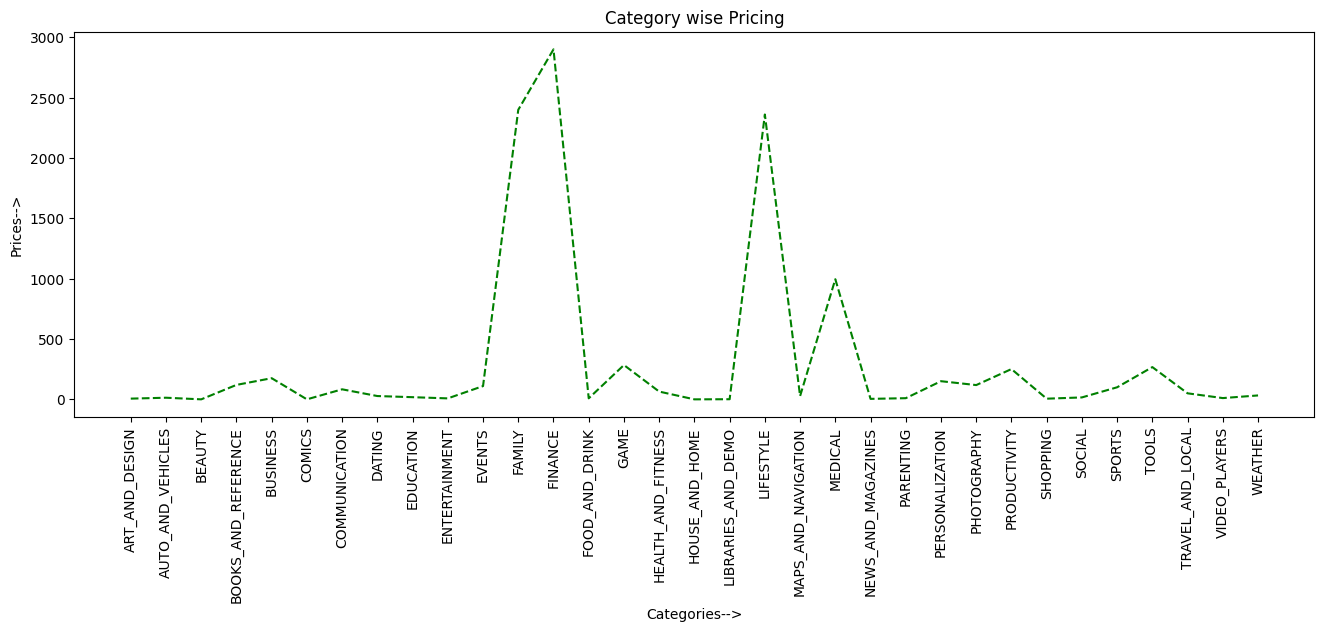

In [32]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

================================================THANKYOU===============================================

queries mail at: ranisoni6298@gmail.com